# Preamble

Load necessary packages and the lab data

In [295]:
import pickle
import numpy
import pandas
from IPython.display import Markdown
from matplotlib import pyplot

with open('Lab2.pkl', 'rb') as f:
    Lab2_Data, synthetic_identities = pickle.load(f)
    
# The following are helper functions to facilitate printing outputs in the lab without interfering with the autograder. Don't concern yourself with those functions, but keep them in your submission.
def safe_print_err(e, locals=locals(), globals=globals()):
    locals = locals or {}
    globals = globals or {}
    __problem = eval('__problem', locals, globals)
    err_msg = str(e)
    if type(e) in (NameError, KeyError):
        var_name_split = str(e).split("'")
        if len(var_name_split) > 1:
            var_name = var_name_split[1]
            err_msg = f"'{var_name}' is not defined."
        
    display(Markdown(f"<div class='alert alert-block alert-danger'><b>Error in problem {__problem}</b>: {err_msg}</div>"))
    
def print_mk(msg):
    display(Markdown(msg))

# Data Description

The dataset we will be using this lab is the 2015-2016 portion of the National Health and Nutrition Examination Survey. The dataset and its documentation may be found at https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015.

We will be using a small subset of the dataset, compiled in the variable `Lab2_Data`, which is a data frame (for documentation [click here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.htmlhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)). Here is a general description of the columns in the data frame (we use the terms **data frame** and **table** interchangeably in this lab):

- `Subject_ID`: this is a sequence number, assigned uniquely to each respondent.
- `Gender`: this is the gender of the subject. 1=Male, 2=Female.
- `Age`: this is the age, in years, of the subject.
- `Marital_Status`: this representes the marital status of the subject.
| `Marital_Status` | Value Description |
| :- | :- |
| $1$ | Married |
| $2$ | Widowed |
| $3$ | Divorced |
| $4$ | Separated |
| $5$ | Never married |
| $6$ | Living with partner |
| $77$ | Refused |
| $99$ | Don't know |
| NaN | Missing|
- `Country_Birth`: the country where the subject was born.<br>
| `Country_Birth` | Value Description |
| :- | :- |
| $1$ | Born in 50 US states or Washington, DC |
| $2$ | Others |
| $77$ | Refused |
| $99$ | Don't know |
| NaN | Missing|
- `Race`: the race of the subject.<br>
| `Race` | Value Description |
| :- | :- |
| $1$ | Mexican American |
| $2$ | Other Hispanic |
| $3$ | Non-Hispanic White |
| $4$ | Non-Hispanic Black |
| $6$ | Non-Hispanic Asian |
| $7$ | Other Race - Including Multi-Racial |
| NaN | Missing |
- `Household_Income`: the annual household income, reported as a range in US\\$.
| `Household_Income` | Value Description |
| :- | :- |
| $1$ | \\$0 to \\$4,999 |
| $2$ | \\$5,000 to \\$9,999 |
| $3$ | \\$10,000 to \\$14,999 |
| $4$ | \\$15,000 to \\$19,999 |
| $5$ | \\$20,000 to \\$24,999 |
| $6$ | \\$25,000 to \\$34,999 |
| $7$ | \\$35,000 to \\$44,999 |
| $8$ | \\$45,000 to \\$54,999 |
| $9$ | \\$55,000 to \\$64,999 |
| $10$ | \\$65,000 to \\$74,999 |
| $12$ | \\$20,000 and Over |
| $13$ | Under \\$20,000 |
| $14$ | \\$75,000 to \\$99,999 |
| $15$ | \\$100,000 and Over |
| $77$ | Refused |
| $99$ | Don't know |
| NaN | Missing |
- `Alcohol_12_or_More_Ever`: The response to the question: "In your entire life, have you had at least 12 drinks of any type of alcoholic beverage?"
| `Alcohol_12_or_More_Ever` | Value Description |
| :- | :- |
| $1$ | Yes |
| $2$ | No |
| $7$ | Refused |
| $9$ | Don't know |
| NaN | Missing |
- `Alcohol_Average`: The response to the question: "In the past 12 months, on those days that you drank alcoholic beverages, on the average, how many drinks did you have? By a drink, I mean a 12 oz. beer, a 5 oz. glass of wine, or one and a half ounces of liquor."
| `Alcohol_Average` | Value Description |
| :- | :- |
| $1$ to $14$ | Range of Values |
| $15$ | $15$ drinks or more |
| $777$ | Refused |
| $999$ | Don't know |
| NaN | Missing |
- `EverUsed_Cocaine_Heroin_OR_Methamphetamine`: The response to the question: "Have you ever used cocaine, crack cocaine, heroin, or methamphetamine?"
| `EverUsed_Cocaine_Heroin_OR_Methamphetamine` | Value Description |
| :- | :- |
| $1$ | Yes |
| $2$ | No |
| $7$ | Refused |
| $9$ | Don't know |
| NaN | Missing |

# Tutorial: Joining Data Frames

We can join two data frames based on the values of their common attributes. There are many ways to join data frames, all of which match the rows of both data frames based on the values of the common columns.

To demonstrate some of these ways, we start by introducing two data frames:

In [296]:
table_1 = pandas.DataFrame()
table_1["Common_Column"] = [1, 2, 2, 4, numpy.nan, 5]
table_1["Other_Column_1"] = [100, 200, 300, 400, 500, 600]
table_1["Other_Column_2"] = [10, 20, 30, 40, 50, 60]

display(table_1)

,Common_Column,Other_Column_1,Other_Column_2
0,1.0,100,10
1,2.0,200,20
2,2.0,300,30
3,4.0,400,40
4,NaN,500,50
5,5.0,600,60


In [297]:
table_2 = pandas.DataFrame()

table_2["Common_Column"] = [1, 1, numpy.nan, 2, 4, 6, numpy.nan]
table_2["Other_Column_3"] = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
table_2["Other_Column_4"] = [10, 20, 30, numpy.nan, 50, 60, 70]

display(table_2)

,Common_Column,Other_Column_3,Other_Column_4
0,1.0,a,10.0
1,1.0,b,20.0
2,NaN,c,30.0
3,2.0,d,NaN
4,4.0,e,50.0
5,6.0,f,60.0
6,NaN,g,70.0


Note that both data frames have the column `Common_Column` in common (note that joins can handle multiple common columns, as we will see in this lab).

## Inner Join

Inner joins outputs only rows from both data frames that agree on the values of the common columns. By default, the inner join output will include the values of the common columns in addition to all other columns that appear in either table.

For example:

In [298]:
ijoin_1_2 = table_1.merge(table_2)
display(ijoin_1_2)

,Common_Column,Other_Column_1,Other_Column_2,Other_Column_3,Other_Column_4
0,1.0,100,10,a,10.0
1,1.0,100,10,b,20.0
2,2.0,200,20,d,NaN
3,2.0,300,30,d,NaN
4,4.0,400,40,e,50.0
5,NaN,500,50,c,30.0
6,NaN,500,50,g,70.0


The building of each row in the output table has to include values from *both* tables. In other words, each row in the inner join can be projected back onto a row in each of the two original tables.

**Important:** Note that `pandas` joins data frames with common column value `NaN` as matching values (which is considered incorrect behavior). The correct behavior is that `NaN` values should *not* match in the common columns. To fix this, we can drop rows with `NaN` values in the common columns from one of the tables.

For example:

In [299]:
correct_ijoin_1_2 = table_1.dropna(subset="Common_Column").merge(table_2)
display(correct_ijoin_1_2)

,Common_Column,Other_Column_1,Other_Column_2,Other_Column_3,Other_Column_4
0,1.0,100,10,a,10.0
1,1.0,100,10,b,20.0
2,2.0,200,20,d,NaN
3,2.0,300,30,d,NaN
4,4.0,400,40,e,50.0


In a visual way, the inner join returns the "inner" part of the Venn diagram of the two tables:

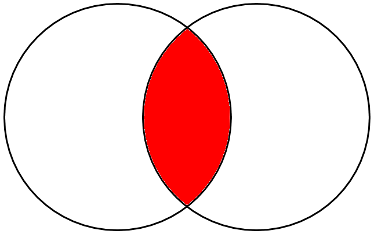

## Left Outer Join

In left outer joins, every row from the left table is represented in the output. Any row that matches (on the values of the common columns) it from the right table is joined with it in the result just like in inner joins. Additionally, if there is a row from the left table that doesn't match any row from the right table, then that row is represented in the output, with the values for the non-common columns from the right table all filled as `NaN`. Here's an example, in which the row with `Common_Column=5.0` (from `table_1`) is in the result of the left join with `Other_Column_3` and `Other_Column_4` values filled as `NaN`:

In [300]:
lojoin_1_2 = table_1.dropna(subset="Common_Column").merge(table_2, how='left')
display(lojoin_1_2)

,Common_Column,Other_Column_1,Other_Column_2,Other_Column_3,Other_Column_4
0,1.0,100,10,a,10.0
1,1.0,100,10,b,20.0
2,2.0,200,20,d,NaN
3,2.0,300,30,d,NaN
4,4.0,400,40,e,50.0
5,5.0,600,60,NaN,NaN


Note here that `NaN` values in the common columns would still be incorrectly matched to other `NaN` values (therefore, we still would `.dropna()` over the common column from the **left** table).

Visually, left outer joins are the left part of the Venn diagram:

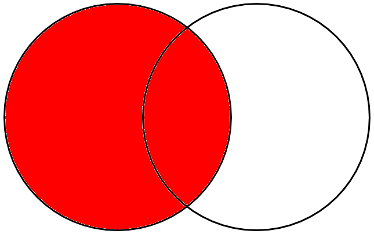

Where the common part represents rows that are matched in both tables, and the rest represents rows in the left table but not the right one.


## Right Outer Join

In right outer joins, every row from the right table is represented in the output. Any row that matches (on the values of the common columns) it from the left table is joined with it in the result just like in inner joins. Additionally, if there is a row from the right table that doesn't match any row from the left table, then that row is represented in the output, with the values for the non-common columns from the left table all filled as `NaN`. Here's an example, in which the row with `Common_Column=6.0` (from `table_2`) is in the result of the left join with `Other_Column_1` and `Other_Column_2` values filled as `NaN`:

In [301]:
rojoin_1_2 = table_1.merge(table_2.dropna(subset="Common_Column"), how='right')
display(rojoin_1_2)

,Common_Column,Other_Column_1,Other_Column_2,Other_Column_3,Other_Column_4
0,1.0,100.0,10.0,a,10.0
1,1.0,100.0,10.0,b,20.0
2,2.0,200.0,20.0,d,NaN
3,2.0,300.0,30.0,d,NaN
4,4.0,400.0,40.0,e,50.0
5,6.0,NaN,NaN,f,60.0


Note here that `NaN` values in the common columns would still be incorrectly matched to other `NaN` values (therefore, we still would `.dropna()` over the common column in the **right** table).

Visually, right outer joins are the right part of the Venn diagram:

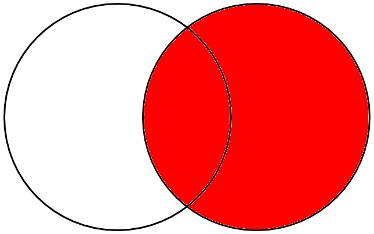

Where the common part represents rows that are matched in both tables, and the rest represents rows in the right table but not the left one.

## Full Outer Join

Full outer joins is the "full picture." Any row from the left of the right is going to be represented in the result. If rows match from the left and right, then they are joined as we've seen before. If a row from one side cannot be matched with another row from the other side, then the row is in the result with the values for the other attributes set to `NaN` as discussed earlier.

For example:

In [302]:
ojoin_1_2 = table_1.dropna(subset="Common_Column").merge(table_2.dropna(subset="Common_Column"), how="outer")
display(ojoin_1_2)

,Common_Column,Other_Column_1,Other_Column_2,Other_Column_3,Other_Column_4
0,1.0,100.0,10.0,a,10.0
1,1.0,100.0,10.0,b,20.0
2,2.0,200.0,20.0,d,NaN
3,2.0,300.0,30.0,d,NaN
4,4.0,400.0,40.0,e,50.0
5,5.0,600.0,60.0,NaN,NaN
6,6.0,NaN,NaN,f,60.0


Note here that `NaN` values in the common columns would still be incorrectly matched to other `NaN` values (therefore, we still would `.dropna()` over the common column in the both tables).

Visually, full outer joins are the full Venn diagram:

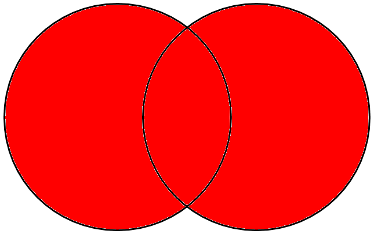

# Problem 1

In this problem we will investigate k-anonymity.

## (a) Equivalence Classes

In this part, we will write code that enables us to find all possible equivalence classes from a given table and a set of columns constituting a set of quasi-identifiers. Consider the following list that contains the names of attributes from the data that we consider to be quasi-identifiers:

```python
qID = ['Gender', 'Race']
```

Write code that creates a data frame `p1a_eqv_classes` that is a projection of the original table `Lab2_Data` on the set of quasi-identifiers qID, and contains exactly one row per combination of values for the quasi-identifier attributes.

In other words, the variable `p1a_eqv_classes` should describe the equivalence classes in the original data (i.e. without repititions).

**Hint**: the function **[`DataFrame.drop_duplicates()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)** can take a data frame and return unique rows.

Complete the following code snippet with your answer:

In [303]:
# The QIDs
qID = ['Gender', 'Race']

gr_table = Lab2_Data[qID]
p1a_eqv_classes = gr_table \
  .sort_values(by=qID[0]) \
  .drop_duplicates(ignore_index=True) \
  .dropna()

# display(p1a_eqv_classes)



Run the following cell to print the outcomes of your code.

In [304]:
__problem = '1a'

try:
    print_mk(f"There are ${len(p1a_eqv_classes)}$ equivalence classes:")
    display(p1a_eqv_classes)
except Exception as e:
    safe_print_err(e)

There are $12$ equivalence classes:

,Gender,Race
0,1,3
1,1,4
2,1,6
3,1,1
4,1,2
5,1,7
6,2,1
7,2,2
8,2,4
9,2,3


--- 

## (b) k?

In this part, we will write code that calculates, for each equivalence class, the number of records/rows in the original data that belong to that equivalence class (i.e., the $k$-Anonymity value for that equivalence class).

Write code that creates the following variables:

- `p1b_eqv_classes`: A data frame that is similar to `p1a_eqv_classes` from the previous part. In this data frame, populate a new column named `k` and assigns to it the number of rows in `Lab2_Data` that belong to each corresponding equivalence class.
- `p1b_k`: Using the new column `k` in `p1b_eqv_classes`, calculate the best $k$-anonymity guarantee we can give on the table `Lab2_Data`, assuming `qID` as quasi-identifiers.

Complete the following code snippet with your answer:

In [305]:
# The QIDs
qID = ["Gender", "Race"]

"""
Function written by Karl for HW3
- Boaz
"""
def k_anonymity(df, quasi_identifiers):
    """
    Check k-anonymity for a given DataFrame.

    Parameters:
        df (pd.DataFrame): The input dataset.
        quasi_identifiers (list): List of quasi-identifier column names.

    Returns:
        integer: k-anon the k-anonymity score for the QI.
        pd.DataFrame: Grouped counts of quasi-identifier combinations.
    """
    grouped = df.groupby(quasi_identifiers).size().reset_index(name="k")
    k_anon = grouped["k"].min()
    return k_anon, grouped

p1b_k, p1b_eqv_classes = k_anonymity(Lab2_Data, qID)


Run the following cell to print the outcomes of your code.

In [306]:
__problem = '1b'

try:
    print_mk(f"There are ${len(p1b_eqv_classes)}$ equivalence classes:")
    display(p1b_eqv_classes)
    print_mk(f"The best $k$-Anonymity guarantee for `Lab2_Data` is $k={p1b_k}$.")
except Exception as e:
    safe_print_err(e)

There are $12$ equivalence classes:

,Gender,Race,k
0,1,1,236
1,1,2,158
2,1,3,472
3,1,4,297
4,1,6,167
5,1,7,61
6,2,1,213
7,2,2,165
8,2,3,474
9,2,4,283


The best $k$-Anonymity guarantee for `Lab2_Data` is $k=58$.

---

## (c) Implement k-Anonymity Analyzer

In this part, we will enclose the code you wrote in the last two parts into the function `kAnonymity_Analyze()`. Complete the implementation of the function `kAnonymity_Analyze` below.

The function `kAnonymity_Analyze` takes two arguments:
- `data`: the data frame to be analyzed; and
- `qID`: a list containing the names of the columns that constitute the set of quasi-identifiers.

The function `kAnonymity_Analyze` should return two outputs:
- `k`: the best value $k$ that the table `data` (input argument) satisfies $k$-Anonymity with, with respect to the set of quasi-identifiers `qID` (input argument).
- `equivalence_classes`: a table of equivalence classes in the same format as part (b) of this problem (including the column `k`).

Replace the following code snippet with your answer:

In [307]:
# Your solution goes here
def kAnonymity_Analyze(data, qID):
  return k_anonymity(data, qID)


For instance, after you implement the function `kAnonymity_Analyze`, the following code should yield the same outcomes as in the part (b) of this problem.
 
Run the following cell to print the outcomes of your code.

In [308]:
__problem = '1c'

try:
    p1c_k, p1c_eqv_classes = kAnonymity_Analyze(Lab2_Data, ["Gender", "Race"])
    print_mk(f"Using the function call, there are ${len(p1c_eqv_classes)}$ equivalence classes:")
    display(p1c_eqv_classes)
    print_mk(f"The best $k$-Anonymity guarantee for `Lab2_Data` is $k={p1c_k}$.")
except Exception as e:
    safe_print_err(e)

Using the function call, there are $12$ equivalence classes:

,Gender,Race,k
0,1,1,236
1,1,2,158
2,1,3,472
3,1,4,297
4,1,6,167
5,1,7,61
6,2,1,213
7,2,2,165
8,2,3,474
9,2,4,283


The best $k$-Anonymity guarantee for `Lab2_Data` is $k=58$.

---

## (d) Different Quasi-Identifiers?

We will now demonstrate the subset property from the lectures. Use the function `kAnonymity_Analyze()` to check whether the value $k$ drops or grows when the set of quasi-identifiers shrinks and when it grows. Concretely, run the function `kAnonymity_Analyze()` on `Lab2_Data` three times, and assign the results in the following variables:

- `p1d_k_qid1` and `p1d_ec_qid1`: Assuming that the set of quasi-identifiers is solely the attribute 'Gender';
- `p1d_k_qid2` and `p1d_ec_qid2`: Assuming that the set of quasi-identifiers is solely the attribute 'Race'; and
- `p1d_k_qid3` and `p1d_ec_qid3`: Assuming that the set of quasi-identifiers is the set 'Gender', 'Race', 'Age', 'Marital_Status', and 'Country_Birth'.

Replace the following code snippet with your answer:

In [309]:
qIDsets = [
  ['Gender'],
  ['Race'],
  ['Gender', 'Race', 'Age', 'Marital_Status', 'Country_Birth'],
]
results = [kAnonymity_Analyze(Lab2_Data, qids) for qids in  qIDsets]

p1d_k_qid1, p1d_ec_qid1 = results[0]
p1d_k_qid2, p1d_ec_qid2 = results[1]
p1d_k_qid3, p1d_ec_qid3 = results[2]

Run the following cell to print the outcomes of your code.

In [310]:
__problem = '1d'

try:
    print_mk(f'With `qID = ["Gender"]`, there are ${len(p1d_ec_qid1)}$ equivalence classes:')
    display(p1d_ec_qid1)
    print_mk(f"The table satisfies ${p1d_k_qid1}$-Anonymity")
    print_mk("<br><br>")
    print_mk(f'With `qID = ["Race"]`, there are ${len(p1d_ec_qid2)}$ equivalence classes:')
    display(p1d_ec_qid2)
    print_mk(f"The table satisfies ${p1d_k_qid2}$-Anonymity")
    print_mk("<br><br>")
    print_mk(f'With `qID = ["Gender", "Race", "Age", "Marital_Status", "Country_Birth"]`, there are ${len(p1d_ec_qid3)}$ equivalence classes:')
    display(p1d_ec_qid3)
    print_mk(f"The table satisfies ${p1d_k_qid3}$-Anonymity")
except Exception as e:
    safe_print_err(e)

With `qID = ["Gender"]`, there are $2$ equivalence classes:

,Gender,k
0,1,1391
1,2,1286


The table satisfies $1286$-Anonymity

<br><br>

With `qID = ["Race"]`, there are $6$ equivalence classes:

,Race,k
0,1,449
1,2,323
2,3,946
3,4,580
4,6,260
5,7,119


The table satisfies $119$-Anonymity

<br><br>

With `qID = ["Gender", "Race", "Age", "Marital_Status", "Country_Birth"]`, there are $1452$ equivalence classes:

,Gender,Race,Age,Marital_Status,Country_Birth,k
0,1,1,20,5,1,2
1,1,1,21,5,1,4
2,1,1,22,1,1,1
3,1,1,22,5,1,2
4,1,1,22,6,2,1
...,...,...,...,...,...,...
1447,2,7,62,3,1,1
1448,2,7,63,1,1,2
1449,2,7,65,2,1,1
1450,2,7,68,4,2,1


The table satisfies $1$-Anonymity

### In this Markdown cell, answer the following questions

- For which sets of quasi-identifiers did $k$ decrease compared to the part (c)?  
**For qid = ["Gender", "Race", "Age", "Marital_Status", "Country_Birth"].**  
  
- For which sets of quasi-identifiers did $k$ increase compared to the part (c)?  
**For qid = ["Gender"] and qid = ["Race"].**  
  
- Is this consistent with the subset property from lecture?  
**Yes. Removing quasi-identifiers can't hurt privacy while adding quasi-identifiers can't help privacy.**

---

## (e) De-anonymizing the Dataset

You are given another table in the variable `synthetic_identities`. This table has made-up identities of the individuals in the dataset `Lab2_Data` alongside their (made-up) demographic information as defined in the quasi-identifiers (of course without their subject IDs). That is, the table `synthetic_identities` has the following attributes: `First_Name`, `Middle_Name`, `Last_Names`, `Full_Name`, `Gender`, `Age`, `Marital_Status`, `Country_Birth`, and `Race`.

Perform the appropriate join operation to join the two tables `Lab2_Data` and `synthetic_identities` in order to reidentify the subjects (as much as possible) in the dataset `Lab2_Data`. Store the result of the join operation in the variable `p1e_reidentified_data`.

In each of the following variables, assign the possible `Subject_ID` values for the corresponding subject, based on the join:

- `p1e_sids_s1`: the possible `Subject_ID` values for 'Gershom Hersch Gideon'
- `p1e_sids_s2`: the possible `Subject_ID` values for 'Lincoln Jerald Dominick'
- `p1e_sids_s3`: the possible `Subject_ID` values for 'Wojciech Tobe Ashby'
- `p1e_sids_s4`: the possible `Subject_ID` values for 'Cesar Derick Newton'

Complete the following code snippet with your answer:

In [311]:
# The full list of QIDs
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']

p1e_reidentified_data = synthetic_identities.dropna().merge(Lab2_Data)

gershom = p1e_reidentified_data[p1e_reidentified_data['Full_Name'] == 'Gershom Hersch Gideon']
lincoln = p1e_reidentified_data[p1e_reidentified_data['Full_Name'] == 'Lincoln Jerald Dominick']
wojciech = p1e_reidentified_data[p1e_reidentified_data['Full_Name'] == 'Wojciech Tobe Ashby']
cesar = p1e_reidentified_data[p1e_reidentified_data['Full_Name'] == 'Cesar Derick Newton']

p1e_sids_s1 = gershom['Subject_ID']
p1e_sids_s2 = lincoln['Subject_ID']
p1e_sids_s3 = wojciech['Subject_ID']
p1e_sids_s4 = cesar['Subject_ID']


# Your solution goes here

Run the following cell to print the outcomes of your code.

In [312]:
__problem = '1e'

try:
    print_mk(f"There are ${len(p1e_reidentified_data)}$ records in the reidentified table:")
    display(p1e_reidentified_data)
    print_mk(f"The set of possible subject IDs for subject 'Gershom Hersch Gideon' is {{${set(p1e_sids_s1)}$}}.")
    print_mk(f"The set of possible subject IDs for subject 'Lincoln Jerald Dominick' is {{${set(p1e_sids_s2)}$}}.")
    print_mk(f"The set of possible subject IDs for subject 'Wojciech Tobe Ashby' is {{${set(p1e_sids_s3)}$}}.")
    print_mk(f"The set of possible subject IDs for subject 'Cesar Derick Newton' is {{${set(p1e_sids_s4)}$}}.")
except Exception as e:
    safe_print_err(e)

There are $11133$ records in the reidentified table:

,First_Name,Middle_Name,Last_Names,Full_Name,Gender,Age,Marital_Status,Country_Birth,Race,Subject_ID,Household_Income,Alcohol_12_or_More_Ever,Alcohol_Average,EverUsed_Cocaine_Heroin_OR_Methamphetamine
0,Lucas,Lawrence,Bernardo,Lucas Lawrence Bernardo,1,38,3.0,1,3,84398,6,NaN,5,2
1,Lucas,Lawrence,Bernardo,Lucas Lawrence Bernardo,1,38,3.0,1,3,85259,6,NaN,10,1
2,Mathias,Rodd,Merv,Mathias Rodd Merv,1,22,5.0,1,2,90099,15,NaN,3,2
3,Mathias,Rodd,Merv,Mathias Rodd Merv,1,22,5.0,1,2,92099,15,NaN,5,1
4,Klaus,Preston,Krishna,Klaus Preston Krishna,1,65,1.0,1,3,84567,4,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11128,Josi,Correna,Randolph,Josi Correna Randolph,2,22,3.0,2,2,86868,10,NaN,3,2
11129,Daniel,Ambros,Darryl,Daniel Ambros Darryl,1,57,1.0,2,4,90412,15,NaN,1,2
11130,Daniel,Ambros,Darryl,Daniel Ambros Darryl,1,57,1.0,2,4,91647,10,NaN,3,2
11131,Philomena,Kayla,Gregorio,Philomena Kayla Gregorio,2,39,1.0,1,6,91570,15,NaN,2,2


The set of possible subject IDs for subject 'Gershom Hersch Gideon' is {${89594, 87948, 91095}$}.

The set of possible subject IDs for subject 'Lincoln Jerald Dominick' is {${90009}$}.

The set of possible subject IDs for subject 'Wojciech Tobe Ashby' is {${91712, 89127}$}.

The set of possible subject IDs for subject 'Cesar Derick Newton' is {${93223, 92905, 89067, 91115, 88911, 84287}$}.

### In this Markdown cell, answer the following question

Which out of these subjects can be uniquely identified in the dataset `Lab2_Data`?

Lincoln Jerald Dominick can be uniquely identified as subject 90009.

---

## (f) Attributes?

As a follow-up to the previous part, what are the possible values for the attribute `Alcohol_Average` for each of the four subjects from part (e)? Assign the result of your calculation in the following variables:

- `p1f_alc_s1`: the possible `Alcohol_Average` values for 'Gershom Hersch Gideon'
- `p1f_alc_s2`: the possible `Alcohol_Average` values for 'Lincoln Jerald Dominick'
- `p1f_alc_s3`: the possible `Alcohol_Average` values for 'Wojciech Tobe Ashby'
- `p1f_alc_s4`: the possible `Alcohol_Average` values for 'Cesar Derick Newton'

Replace the following code snippet with your answer:

In [313]:
p1f_alc_s1 = gershom['Alcohol_Average']
p1f_alc_s2 = lincoln['Alcohol_Average']
p1f_alc_s3 = wojciech['Alcohol_Average']
p1f_alc_s4 = cesar['Alcohol_Average']

Run the following cell to print the outcomes of your code.

In [314]:
__problem = '1f'

try:
    print_mk(f"The set of possible Alcohol_Average values for subject 'Gershom Hersch Gideon' is {{${set(p1f_alc_s1)}$}}.")
    print_mk(f"The set of possible Alcohol_Average values for subject 'Lincoln Jerald Dominick' is {{${set(p1f_alc_s2)}$}}.")
    print_mk(f"The set of possible Alcohol_Average values for subject 'Wojciech Tobe Ashby' is {{${set(p1f_alc_s3)}$}}.")
    print_mk(f"The set of possible Alcohol_Average values for subject 'Cesar Derick Newton' is {{${set(p1f_alc_s4)}$}}.")
except Exception as e:
    safe_print_err(e)

The set of possible Alcohol_Average values for subject 'Gershom Hersch Gideon' is {${8, 3, 5}$}.

The set of possible Alcohol_Average values for subject 'Lincoln Jerald Dominick' is {${2}$}.

The set of possible Alcohol_Average values for subject 'Wojciech Tobe Ashby' is {${3}$}.

The set of possible Alcohol_Average values for subject 'Cesar Derick Newton' is {${2, 3, 4, 6}$}.

### In this Markdown cell, answer the following questions

- For which out of these subjects can you uniquely assert the value of the attribute `Alcohol_Average`?
- Are these the same subjects you were able to uniquely identify in the previous part? Explain.

We can uniquely identify the attribute 'Alcohol_Average' for Lincoln and Wojciech. Lincoln we identified in the dataset in the last problem, but Wojciech had an attribute disclosed despite us not knowing which specific record was theirs because all their possible records had the same value for that attribute.

---

## (g) Anonymizing the Table

It is clear that if we are to release all columns of the data, then we have to consider the set of quasi-identifiers to include at least `Gender`, `Age`, `Marital_Status`, `Country_Birth`, and `Race`:

```python
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
```

But as we've seen from the previous parts, this set leads to very bad value for $k$ and a very bad privacy guarantee.

In this part, we will generalize the table `Lab2_Data` with respect to some of its quasi-identifiers in an effort to increase the value $k$ for which this table is $k$-anonymous.

Write code that makes the following generalizations:
- `Marital_Status`: generalize all values that are neither "Married" nor "Never Married" to the value 7, indicating "Other." (You will end up with 3 distinct values: one for "Married," another for "Never Married" and yet another for "Other.")
- `Race`: generalize the values "Mexican American" and "Other Hispanic" to the value 8, indicating "Hispanic".
- `Race`: generalize the values "Non-Hispanic Asian" and "Other Race - Including Multi-Racial" to the value 9, indicating "Other".
- `Age`: generalize the values 0-30 to 30, the values 31-40 to 40, the values 41-50 to 50, and the values 51-70 to 70.
- `Country_Birth`: generalize all values to 3, indicating "Earth"

Assign this generalized table to the variable `p1g_data`.

**Make sure you don't directly edit the table `Lab2_Data` so to not affect the following parts/problems. For that, take a look at the function [`DataFrame.copy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)**.

Complete the following code snippet with your answer:

In [315]:
#qIDs:
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']

# start by copying the table
p1g_data = Lab2_Data.copy()
ms = p1g_data['Marital_Status']
ms = ms.mask((ms != 1) & (ms != 5), 7)
p1g_data['Marital_Status'] = ms

r = p1g_data['Race']
r = r.mask((r == 1) | (r == 2), 8)
r = r.mask((r == 6) | (r == 7), 9)
p1g_data['Race'] = r

a = p1g_data['Age']
a = a.mask((a > 0) & (a <= 30), 30)
a = a.mask((a > 30) & (a <= 40), 40)
a = a.mask((a > 40) & (a <= 50), 50)
a = a.mask((a > 50) & (a <= 70), 70)
p1g_data['Age'] = a

p1g_data['Country_Birth'] = 3

# display(p1g_data)
# display(Lab2_Data)

# display(kAnonymity_Analyze(p1g_data, qID)[1])
# print(kAnonymity_Analyze(p1g_data, qID)[0])


# Your solution goes here

<!-- Run the following cell to print the outcomes of your code. -->

In [316]:
__problem = '1g'

try:
    [p1g_k, p1g_eqv_classes] = kAnonymity_Analyze(p1g_data, qID)
    print_mk(f'The table is ${p1g_k}$-anonymous with full set of quasi-identifier')
    print_mk(f'The following are the equivalence classes with $k={p1g_k}$')
    display(p1g_eqv_classes.loc[p1g_eqv_classes.k == p1g_k,:])
except Exception as e:
    safe_print_err(e)

The table is $2$-anonymous with full set of quasi-identifier

The following are the equivalence classes with $k=2$

,Gender,Age,Marital_Status,Country_Birth,Race,k
79,2,50,5,3,9,2
91,2,70,5,3,9,2


---

## (h) Distribution of k?

One way to visualize the utility-privacy tradeoff is as follows. The higher we make $k$, the less demographic information we retain (in terms of granularity). Therefore, the more we generalize, the less utility we have. However, if we generalize a table in such a way that, for example, one equivalence class has $k=2$ and all other equivalence classes have $k=100$ (resulting in a best guarantee for the table of $k=2$) then perhaps there is a better generalization that would make the rest of the equivalence classes have a smaller $k$ than 100 (but still at least 2), and thus provide the same $k$-Anonymity guarantee ($k=2$) while potentially providing higher utility because that table is less generalized.

In this part, we will look at the distribution of the values $k$ for the different equivalence classes using the quasi-identifiers from the previous part.

Write code that plots the histogram of the values $k$ for the different equivalence classes (for the generalized table from part **1g**), using the following bins:

```python
bins = range(0,101,5)
```

Don't forget to label the axes and title the figure.

Complete the following code snippet with your answer:

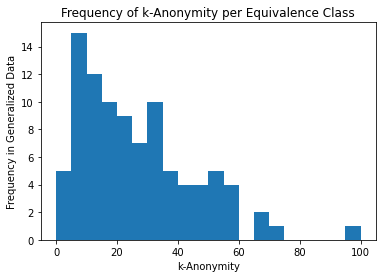

In [317]:
# The bins
bins = range(0,101,5)

p1h_figure = pyplot.figure()
pyplot.hist(kAnonymity_Analyze(p1g_data, qID)[1]['k'], bins)
pyplot.title('Frequency of k-Anonymity per Equivalence Class')
pyplot.xlabel('k-Anonymity')
pyplot.ylabel('Frequency in Generalized Data')
pyplot.show()

# display(kAnonymity_Analyze(p1g_data, qID)[1])
# print(kAnonymity_Analyze(p1g_data, qID)[0])

Run the following cell to print the outcomes of your code.

In [318]:
__problem = '1h'

p1h_nr_children = len(p1h_figure.get_children())
if p1h_nr_children <= 1:
    safe_print_err("Missing/incomplete answer to 1(h)")
else:
    print_mk(f"p1h_figure has ${p1h_nr_children}$ children")

p1h_figure has $2$ children

### In this Markdown cell, answer the following question

Based on the result, is our generalization a good generalization in terms of the utility-privacy tradeoff, in your opinion? Explain.

**This isn't bad; the median equivalency classes satisfy only a fairly low k-anonymity. However, I'm not convinced that it couldn't be better. There are some outlier ECs that satisfy very high k-anonymity for which we could try to improve the utility by reducing our generalization.**

---

# Problem 2
In this problem we will investigate $\ell$-diversity.

## (a) How Diverse is Each Equivalence Class?

In this part, we will implement the function `lDiversity_Analyze()`. Complete your implementation of the function `lDiversity_Analyze()` as specified below.

The function `lDiversity_Analyze()` takes three arguments:
- `data`: the data table to be analyzed;
- `quasi_identifiers`: a list containing the names of the columns that constitute the set of quasi-identifiers; and
- `sensitive_column`: the column name of the (single) sensitive attribute. The function shall assume that the published table consists only of the quasi-identifiers and the single sensitive attribute (and ignore all other columns).

The function `lDiversity_Analyze()` should return three outputs:
- `lEntropy`: the best value $\ell$ that the table `data_table` (input argument) satisfies Entropy $\ell$-Diversity with, with respect to the set of quasi-identifiers `quasi_identifiers` (input argument) and the sensitive attribute `sensitive_column` (input argument).
- `lDistinct`: the best value $\ell$ that the table `data_table` (input argument) satisfies Distinct $\ell$-Diversity with, with respect to the set of quasi-identifiers `quasi_identifiers` (input argument) and the sensitive attribute `sensitive_column` (input argument).
- `equivalence_classes`: a table of equivalence classes (similar to the last problem), including two columns: `lEntropy` and `lDistinct` that indicate the entropy and distinct $\ell$-Diversity values for each equivalence class, respectively.

Replace the following code snippet with your answer:

In [319]:
"""
Reusing Karl's functions from HW3
"""
def distinct_l_diversity(df, quasi_identifiers, sensitive_attribute):
    """
    Check distinct l-diversity: Ensures each group has at least 'l' distinct sensitive values.

    Parameters:
        df (pd.DataFrame): The input dataset.
        quasi_identifiers (list): List of quasi-identifier column names.
        sensitive_attribute (str): The sensitive attribute column.

    Returns:
        integer: score for distinct l-diversity.
        pd.DataFrame: Grouped data with distinct value counts.
    """
    
    ## Group the df sequentially by the quasi identifiers, then select the sensitive attribute and count how many unique values it has
    diversity_scores = df.groupby(quasi_identifiers)[sensitive_attribute].nunique() 
    distinct_l = diversity_scores.min()
    result_df = diversity_scores.reset_index(name=f"lDistinct")
    return distinct_l, result_df

def entropy_l_diversity(df, quasi_identifiers, sensitive_attribute):
    """
    Check entropy l-diversity: Calculates the l-diversity for the table using log2.

    Parameters:
        df (pd.DataFrame): The input dataset.
        quasi_identifiers (list): List of quasi-identifier column names.
        sensitive_attribute (str): The sensitive attribute column.

    Returns:
        l_diversity: Calculated l-diversity for the whole table (the minimum found for all equiv. class)
        result_df: pd.DataFrame Grouped data with entropy values for each quasi identifier.
    """
    
    def entropy(group):
        """
        Sub function to calculate entropy, per entry 
        Parameters: 
            group, output from df.groupby (df like object) the function operates on each row
            and calculates the entropy
        Returns:
            The summed up entropy and 'reversed' l value for each equivalence class
        """
        probs = group[sensitive_attribute].value_counts(normalize=True) ## probabilities using normalization in one go
        #print(probs)
        log2entropy = -numpy.sum(probs * numpy.log2(probs))  # Shannon entropy
        return 2**log2entropy # Reverse the log to get l

    ## crounch the l-scores for each equivalence class
    diversity_scores = df.groupby(quasi_identifiers).apply(entropy, include_groups=False)
    l_diversity = diversity_scores.min()  # Entropy threshold
    result_df = diversity_scores.reset_index(name=f"lEntropy")
    return l_diversity, result_df

def lDiversity_Analyze(data, quasi_identifiers, sensitive_column):
    lDistinct, distinct_df = distinct_l_diversity(data, quasi_identifiers, sensitive_column)
    lEntropy, entropy_df = entropy_l_diversity(data, quasi_identifiers, sensitive_column)
    display(distinct_df, entropy_df)

    equivalence_classes = distinct_df
    equivalence_classes['lEntropy'] = entropy_df['lEntropy']
    return lEntropy, lDistinct, equivalence_classes

#lDiversity_Analyze(data, quasi_identifiers, sensitive_column)
    

Run the following cell to print the outcomes of your code.

The following code will use the function `lDiversity_Analyze()` to generate the following variables:
- `p2a_entropy_l_c1`, `p2a_distinct_l_c1`, `p2a_eqv_classes_c1`: The return values from the function using
    - Table `Lab2_Data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
- `p2a_entropy_l_c2`, `p2a_distinct_l_c2`, `p2a_eqv_classes_c2`: The return values from the function using
    - Table `p1g_data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
- `p2a_entropy_l_c3`, `p2a_distinct_l_c3`, `p2a_eqv_classes_c3`: The return values from the function using
    - Table `p1g_data`,
    - Sensitive attribute `EverUsed_Cocaine_Heroin_OR_Methamphetamine`, and 
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
- `p2a_entropy_l_c4`, `p2a_distinct_l_c4`, `p2a_eqv_classes_c4`: The return values from the function using
    - Table `p1g_data`,
    - Sensitive attribute `Alcohol_Average`, and
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
- `p2a_entropy_l_c5`, `p2a_distinct_l_c5`, `p2a_eqv_classes_c5`: The return values from the function using
    - Table `p1g_data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifier `['Gender']`.
- `p2a_entropy_l_c6`, `p2a_distinct_l_c6`, `p2a_eqv_classes_c6`: The return values from the function using
    - Table `p1g_data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Race']`.
- `p2a_entropy_l_c7`, `p2a_distinct_l_c7`, `p2a_eqv_classes_c7`: The return values from the function using 
    - Table `p1g_data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Race', 'Age']`.


In [320]:
__problem = '2a'

try:
    # Case 1
    qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
    SA = 'Household_Income'
    p2a_entropy_l_c1, p2a_distinct_l_c1, p2a_eqv_classes_c1 = lDiversity_Analyze(Lab2_Data, qID, SA)

    # Case 2
    qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
    SA = 'Household_Income'
    p2a_entropy_l_c2, p2a_distinct_l_c2, p2a_eqv_classes_c2 = lDiversity_Analyze(p1g_data, qID, SA)

    # Case 3
    qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
    SA = 'EverUsed_Cocaine_Heroin_OR_Methamphetamine'
    p2a_entropy_l_c3, p2a_distinct_l_c3, p2a_eqv_classes_c3 = lDiversity_Analyze(p1g_data, qID, SA)

    # Case 4
    qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
    SA = 'Alcohol_Average'
    p2a_entropy_l_c4, p2a_distinct_l_c4, p2a_eqv_classes_c4 = lDiversity_Analyze(p1g_data, qID, SA)

    # Case 5
    qID = ['Gender']
    SA = 'Household_Income'
    p2a_entropy_l_c5, p2a_distinct_l_c5, p2a_eqv_classes_c5 = lDiversity_Analyze(p1g_data, qID, SA)

    # Case 6
    qID = ['Gender', 'Race']
    SA = 'Household_Income'
    p2a_entropy_l_c6, p2a_distinct_l_c6, p2a_eqv_classes_c6 = lDiversity_Analyze(p1g_data, qID, SA)

    # Case 7
    qID = ['Gender', 'Race', 'Age']
    SA = 'Household_Income'
    p2a_entropy_l_c7, p2a_distinct_l_c7, p2a_eqv_classes_c7 = lDiversity_Analyze(p1g_data, qID, SA)

    print_mk(f"\
| Case # | Table       | Quasi-Identifiers       | Sensitive Attribute                          | Entropy $\\ell$         | Distinct $\\ell$     | # ECs                     |\n\
| :-     | :-          | :-                      | :-                                           | :-:                     | :-:                  | :-:                       |\n\
| 1      | `Lab2_Data` | Full                    | `Household_Income`                           | {p2a_entropy_l_c1:.4f}  | {p2a_distinct_l_c1}  | {len(p2a_eqv_classes_c1)} |\n\
| 2      | `p1g_data`  | Full                    | `Household_Income`                           | {p2a_entropy_l_c2:.4f}  | {p2a_distinct_l_c2}  | {len(p2a_eqv_classes_c2)} |\n\
| 3      | `p1g_data`  | Full                    | `EverUsed_Cocaine_Heroin_OR_Methamphetamine` | {p2a_entropy_l_c3:.4f}  | {p2a_distinct_l_c3}  | {len(p2a_eqv_classes_c3)} |\n\
| 4      | `p1g_data`  | Full                    | `Alcohol_Average`                            | {p2a_entropy_l_c4:.4f}  | {p2a_distinct_l_c4}  | {len(p2a_eqv_classes_c4)} |\n\
| 5      | `p1g_data`  | `Gender`                | `Household_Income`                           | {p2a_entropy_l_c5:.4f}  | {p2a_distinct_l_c5}  | {len(p2a_eqv_classes_c5)} |\n\
| 6      | `p1g_data`  | `Gender`, `Race`        | `Household_Income`                           | {p2a_entropy_l_c6:.4f}  | {p2a_distinct_l_c6}  | {len(p2a_eqv_classes_c6)} |\n\
| 7      | `p1g_data`  | `Gender`, `Race`, `Age` | `Household_Income`                           | {p2a_entropy_l_c7:.4f}  | {p2a_distinct_l_c7}  | {len(p2a_eqv_classes_c7)} |\n\
")
except Exception as e:
    safe_print_err(e)

,Gender,Age,Marital_Status,Country_Birth,Race,lDistinct
0,1,20,1,1,4,1
1,1,20,5,1,1,2
2,1,20,5,1,2,1
3,1,20,5,1,3,4
4,1,20,5,1,4,5
...,...,...,...,...,...,...
1447,2,69,2,1,4,1
1448,2,69,3,1,3,1
1449,2,69,5,1,3,1
1450,2,69,5,1,4,2


,Gender,Age,Marital_Status,Country_Birth,Race,lEntropy
0,1,20,1,1,4,1.000000
1,1,20,5,1,1,2.000000
2,1,20,5,1,2,1.000000
3,1,20,5,1,3,4.000000
4,1,20,5,1,4,4.762203
...,...,...,...,...,...,...
1447,2,69,2,1,4,1.000000
1448,2,69,3,1,3,1.000000
1449,2,69,5,1,3,1.000000
1450,2,69,5,1,4,2.000000


,Gender,Age,Marital_Status,Country_Birth,Race,lDistinct
0,1,30,1,3,3,10
1,1,30,1,3,4,6
2,1,30,1,3,8,8
3,1,30,1,3,9,5
4,1,30,5,3,3,12
...,...,...,...,...,...,...
91,2,70,5,3,9,1
92,2,70,7,3,3,13
93,2,70,7,3,4,11
94,2,70,7,3,8,14


,Gender,Age,Marital_Status,Country_Birth,Race,lEntropy
0,1,30,1,3,3,7.121012
1,1,30,1,3,4,5.450692
2,1,30,1,3,8,6.995846
3,1,30,1,3,9,4.585756
4,1,30,5,3,3,8.198776
...,...,...,...,...,...,...
91,2,70,5,3,9,1.000000
92,2,70,7,3,3,10.094608
93,2,70,7,3,4,9.475467
94,2,70,7,3,8,11.999693


,Gender,Age,Marital_Status,Country_Birth,Race,lDistinct
0,1,30,1,3,3,2
1,1,30,1,3,4,2
2,1,30,1,3,8,2
3,1,30,1,3,9,1
4,1,30,5,3,3,2
...,...,...,...,...,...,...
91,2,70,5,3,9,1
92,2,70,7,3,3,2
93,2,70,7,3,4,2
94,2,70,7,3,8,2


,Gender,Age,Marital_Status,Country_Birth,Race,lEntropy
0,1,30,1,3,3,1.518273
1,1,30,1,3,4,1.649385
2,1,30,1,3,8,1.606631
3,1,30,1,3,9,1.000000
4,1,30,5,3,3,1.809324
...,...,...,...,...,...,...
91,2,70,5,3,9,1.000000
92,2,70,7,3,3,1.849862
93,2,70,7,3,4,1.725634
94,2,70,7,3,8,1.639376


,Gender,Age,Marital_Status,Country_Birth,Race,lDistinct
0,1,30,1,3,3,8
1,1,30,1,3,4,6
2,1,30,1,3,8,8
3,1,30,1,3,9,4
4,1,30,5,3,3,11
...,...,...,...,...,...,...
91,2,70,5,3,9,2
92,2,70,7,3,3,8
93,2,70,7,3,4,7
94,2,70,7,3,8,8


,Gender,Age,Marital_Status,Country_Birth,Race,lEntropy
0,1,30,1,3,3,6.178282
1,1,30,1,3,4,4.472136
2,1,30,1,3,8,7.654245
3,1,30,1,3,9,3.709079
4,1,30,5,3,3,8.485354
...,...,...,...,...,...,...
91,2,70,5,3,9,2.000000
92,2,70,7,3,3,4.026699
93,2,70,7,3,4,3.295823
94,2,70,7,3,8,4.427102


,Gender,lDistinct
0,1,14
1,2,14


,Gender,lEntropy
0,1,11.023959
1,2,11.219417


,Gender,Race,lDistinct
0,1,3,13
1,1,4,14
2,1,8,14
3,1,9,14
4,2,3,14
5,2,4,14
6,2,8,14
7,2,9,14


,Gender,Race,lEntropy
0,1,3,9.537069
1,1,4,11.594018
2,1,8,11.859234
3,1,9,9.304584
4,2,3,9.019322
5,2,4,12.314736
6,2,8,11.935312
7,2,9,9.936571


,Gender,Race,Age,lDistinct
0,1,3,30,13
1,1,3,40,13
2,1,3,50,12
3,1,3,70,13
4,1,4,30,13
5,1,4,40,12
6,1,4,50,12
7,1,4,70,14
8,1,8,30,13
9,1,8,40,13


,Gender,Race,Age,lEntropy
0,1,3,30,8.818863
1,1,3,40,10.014251
2,1,3,50,6.485661
3,1,3,70,10.248509
4,1,4,30,10.749153
5,1,4,40,10.316450
6,1,4,50,9.303965
7,1,4,70,11.872321
8,1,8,30,10.533121
9,1,8,40,11.649753


| Case # | Table       | Quasi-Identifiers       | Sensitive Attribute                          | Entropy $\ell$         | Distinct $\ell$     | # ECs                     |
| :-     | :-          | :-                      | :-                                           | :-:                     | :-:                  | :-:                       |
| 1      | `Lab2_Data` | Full                    | `Household_Income`                           | 1.0000  | 1  | 1452 |
| 2      | `p1g_data`  | Full                    | `Household_Income`                           | 1.0000  | 1  | 96 |
| 3      | `p1g_data`  | Full                    | `EverUsed_Cocaine_Heroin_OR_Methamphetamine` | 1.0000  | 1  | 96 |
| 4      | `p1g_data`  | Full                    | `Alcohol_Average`                            | 1.0000  | 1  | 96 |
| 5      | `p1g_data`  | `Gender`                | `Household_Income`                           | 11.0240  | 14  | 2 |
| 6      | `p1g_data`  | `Gender`, `Race`        | `Household_Income`                           | 9.0193  | 13  | 8 |
| 7      | `p1g_data`  | `Gender`, `Race`, `Age` | `Household_Income`                           | 6.4857  | 10  | 32 |


---

## (b) Attribute Disclosure?

Compare the $k$-Anoymity and $\ell$-Diversity guarantees for the table `p1g_data` on the sensitive attribute `Household_Income` using the full set of quasi-identifiers `qID`:

```python
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
```

If your code is correct, you should see that even though $k$-anonymty guarantees that no single record in `p1g_data` can be uniquely linked to a specific subject, we are still not guaranteed to not disclose the sensitive attribute `Household_Income` for our subjects. In this part, we will demonstrate this fact.

Write code to reidentify the subjects in `p1g_data` as much as possible using the made-up identities in table `synthetic_identities`.

Make sure you generalize the attributes in the `synthetic_identities` table to match the generalizaion performed in the previous problem so that the join works as expeted. For convenience, the generalizations appliued in Problem 1g are:
- `Marital_Status`: generalize all values that are neither "Married" nor "Never Married" to the value 7, indicating "Other." (You will end up with 3 distinct values: one for "Married," another for "Never Married" and yet another for "Other.")
- `Race`: generalize the values "Mexican American" and "Other Hispanic" to the value 8, indicating "Hispanic".
- `Race`: generalize the values "Non-Hispanic Asian" and "Other Race - Including Multi-Racial" to the value 9, indicating "Other".
- `Age`: generalize the values 0-30 to 30, the values 31-40 to 40, the values 41-50 to 50, and the values 51-70 to 70.
- `Country_Birth`: generalize all values to 3, indicating "Earth"

Assign this generalized identities table to the variable `p2b_identities`.

**Make sure you don't directly edit the table `synthetic_identities` so to not affect the following parts/problems. For that, take a look at the function [`DataFrame.copy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)**.

Join the tables `p2b_identities` and `p1g_data` and look for the subject `'Dionis Fara Elliott'` to create the following variables:

- `p2b_reidentified_data`: The joined table result.
- `p2b_possible_SIDs`: The possible values for `Subject_IDs` that the Dionis may have.
- `p2b_possible_income`: The possible values for `Household_Income` that Dionis may have.

Complete the following code snippet with your answer:

In [321]:
# qID
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']

# The name of the person of interest
p2b_person_of_interest = 'Dionis Fara Elliott'

# Copy the table
p2b_identities = synthetic_identities.copy()

# Apply the same generalizations as in Problem 1g:

# Marital_Status: generalize all values that are neither "Married" nor "Never Married" to 7
ms = p2b_identities['Marital_Status']
ms = ms.mask((ms != 1) & (ms != 5), 7)
p2b_identities['Marital_Status'] = ms

# Race: generalize "Mexican American" and "Other Hispanic" to 8 (Hispanic)
# Race: generalize "Non-Hispanic Asian" and "Other Race - Including Multi-Racial" to 9 (Other)
r = p2b_identities['Race']
r = r.mask((r == 1) | (r == 2), 8)  # Hispanic
r = r.mask((r == 6) | (r == 7), 9)  # Other
p2b_identities['Race'] = r

# Age: generalize age ranges
a = p2b_identities['Age']
a = a.mask((a > 0) & (a <= 30), 30)
a = a.mask((a > 30) & (a <= 40), 40)
a = a.mask((a > 40) & (a <= 50), 50)
a = a.mask((a > 50) & (a <= 70), 70)
p2b_identities['Age'] = a

# Country_Birth: generalize all values to 3 ("Earth")
p2b_identities['Country_Birth'] = 3

# Join the generalized identities with the genralized data
p2b_reidentified_data = p2b_identities.merge(p1g_data, on=qID)

# Extract records for the person of interest
dionis_records = p2b_reidentified_data[p2b_reidentified_data['Full_Name'] == p2b_person_of_interest]

# Get the possible Subject_IDs and Household_Income values
p2b_possible_SIDs = dionis_records['Subject_ID']
p2b_possible_income = dionis_records['Household_Income']

Run the following cell to print the outcomes of your code.

In [322]:
__problem = '2b'

try:
    print_mk(f"Here are the results for '{p2b_person_of_interest}':\n\n\
| Possible SID values      | Identity disclosure?                                  | Possible income values     | Attribute disclosure?                                   | # Records in reidentified table |\n\
| :-:                      | :-                                                    | :-:                        | :-                                                      | :-:                             |\n\
| {set(p2b_possible_SIDs)} | {'Yes' if len(set(p2b_possible_SIDs)) == 1 else 'No'} | {set(p2b_possible_income)} | {'Yes' if len(set(p2b_possible_income)) == 1 else 'No'} | {len(p2b_reidentified_data)}    |")
except Exception as e:
    safe_print_err(e)

Here are the results for 'Dionis Fara Elliott':

| Possible SID values      | Identity disclosure?                                  | Possible income values     | Attribute disclosure?                                   | # Records in reidentified table |
| :-:                      | :-                                                    | :-:                        | :-                                                      | :-:                             |
| {86416, 89107} | No | {4} | Yes | 204881    |

---

## (c) Diversifying the Table

From the previous parts, we see that we are not providing a good $\ell$-Diversity (neither entropy nor distinct) guarantee for the table `p1g_data` with the full set of quasi-identifiers, even with the $k$-Anonymity guarantee that we provide. Therefore, we would like to generalize the table `p1g_data` further.

Consider the full set of quasi-identifiers:
```python
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
```

Write code that makes the following generalization on top of the previous generalization we already applied to `p1g_data`:

- `Gender`: generalize the values to 3="Human" only for records with property Race = 9

Assign this new generalized version of the data to the variable `p2c_data`.

**Make sure you don't directly edit the table `p1g_data` so to not affect the following parts/problems. For that, take a look at the function [`DataFrame.copy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)**.

Using the generalized table `p2c_data` and the function `lDiversity_Analyze()`, create the following variables:

- `p2c_entropy_l`: The best entropy $\ell$-Diversity guarantee for the table `p2c_data` using quasi-identifiers `qID` and sensitive attribute `SA`,
- `p2c_distinct_l`: The best distinct $\ell$-Diversity guarantee for the table `p2c_data` using quasi-identifiers `qID` and sensitive attribute `SA`, and
- `p2c_eqv_classes`: The equivalence classes report for the table `p2c_data` using quasi-identifiers `qID` and sensitive attribute `SA`,

Complete the following code snippet with your answer:

In [323]:
# qID
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
# Sensitive attribute
SA = 'Household_Income'

# qID
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']

# Sensitive attribute
SA = 'Household_Income'

# Copy the table
p2c_data = p1g_data.copy()

# Generalize Gender to 3="Human" only for records with Race = 9
# This means we need to find all rows where Race = 9 and set Gender to 3
gender_mask = p2c_data['Race'] == 9
p2c_data.loc[gender_mask, 'Gender'] = 3

# Then use the lDiversity_Analyze() function to calculate  entropy & distinct l-diversity
p2c_entropy_l, p2c_distinct_l, p2c_eqv_classes = lDiversity_Analyze(p2c_data, qID, SA)

,Gender,Age,Marital_Status,Country_Birth,Race,lDistinct
0,1,30,1,3,3,10
1,1,30,1,3,4,6
2,1,30,1,3,8,8
3,1,30,5,3,3,12
4,1,30,5,3,4,12
...,...,...,...,...,...,...
79,3,50,5,3,9,5
80,3,50,7,3,9,10
81,3,70,1,3,9,11
82,3,70,5,3,9,4


,Gender,Age,Marital_Status,Country_Birth,Race,lEntropy
0,1,30,1,3,3,7.121012
1,1,30,1,3,4,5.450692
2,1,30,1,3,8,6.995846
3,1,30,5,3,3,8.198776
4,1,30,5,3,4,10.401087
...,...,...,...,...,...,...
79,3,50,5,3,9,5.000000
80,3,50,7,3,9,9.440749
81,3,70,1,3,9,6.806844
82,3,70,5,3,9,3.585989


Run the following cell to print the outcomes of your code.

In [324]:
__problem = '2c'

try:
    print_mk(f'The table satisfies Entropy ${p2c_entropy_l}$-Diversity and Distinct ${p2c_distinct_l}$-Diversity with full set of quasi-identifier')
    print_mk(f'The following are the equivalence classes with $\\ell_e={p2c_entropy_l}$')
    display(p2c_eqv_classes.loc[p2c_eqv_classes.lEntropy == p2c_entropy_l,:])
except Exception as e:
    safe_print_err(e)

The table satisfies Entropy $3.0$-Diversity and Distinct $3$-Diversity with full set of quasi-identifier

The following are the equivalence classes with $\ell_e=3.0$

,Gender,Age,Marital_Status,Country_Birth,Race,lDistinct,lEntropy
37,2,30,1,3,4,3,3.0


### In this Markdown cell, answer the following question

Did the privacy guarantee improve compared to before?

***Not much, it went from $l=1$ to $l=3$ for both distinct and entropy on the "Household Income" sensitive attribute***

---

## (d) Try Again

Write code to reidentify the subjects in `p2c_data` as much as possible. Make sure you generalize the attributes in the identities table `p2b_identities` to match the generalizaion performed in the previous part. For convenience, the generalization applied in part c is:

- `Gender`: generalize the values to 3="Human" only for records with property Race = 9

Assign the generalized identities table to the variable `p2d_identities`.

**Make sure you don't directly edit the table `p2b_identities` so to not affect the following parts/problems. For that, take a look at the function [`DataFrame.copy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)**.

Join the tables `p2d_identities` and `p2c_data` and look for the subject `'Dionis Fara Elliott'` to create the following variables:

- `p2d_reidentified_data`: The joined table result.
- `p2d_possible_SIDs`: The possible values for `Subject_IDs` that the Dionis may have.
- `p2d_possible_income`: The possible values for `Household_Income` that Dionis may have.

Complete the following code snippet with your answer:

In [325]:
# qID
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']

# The name of the person of interest
p2d_person_of_interest = 'Dionis Fara Elliott'

# Copy table from 2(b)
p2d_identities = p2b_identities.copy()

# Apply additional generalization from 2(c):
# Generalize Gender to 3="Human" only for records with Race = 9
gender_mask = p2d_identities['Race'] == 9
p2d_identities.loc[gender_mask, 'Gender'] = 3

# Join the generalized identities with the generalized data from 2(c)
p2d_reidentified_data = p2d_identities.merge(p2c_data, on=qID)

# Extract records for the person of interest
dionis_records = p2d_reidentified_data[p2d_reidentified_data['Full_Name'] == p2d_person_of_interest]

# Get the possible Subject_IDs and Household_Income values
p2d_possible_SIDs = dionis_records['Subject_ID']
p2d_possible_income = dionis_records['Household_Income']

Run the following cell to print the outcomes of your code.

In [326]:
__problem = '2d'

try:
    print_mk(f"Here are the results for '{p2d_person_of_interest}' after generalization:\n\n\
| Possible SID values      | Identity disclosure?                                  | Possible income values     | Attribute disclosure?                                   | # Records in reidentified table |\n\
| :-:                      | :-                                                    | :-:                        | :-                                                      | :-:                             |\n\
| {set(p2d_possible_SIDs)} | {'Yes' if len(set(p2d_possible_SIDs)) == 1 else 'No'} | {set(p2d_possible_income)} | {'Yes' if len(set(p2d_possible_income)) == 1 else 'No'} | {len(p2d_reidentified_data)}    |")
except Exception as e:
    safe_print_err(e)

Here are the results for 'Dionis Fara Elliott' after generalization:

| Possible SID values      | Identity disclosure?                                  | Possible income values     | Attribute disclosure?                                   | # Records in reidentified table |
| :-:                      | :-                                                    | :-:                        | :-                                                      | :-:                             |
| {86980, 86573, 87758, 84463, 86416, 89107, 85815} | No | {4, 12, 6, 15} | No | 224151    |

---

## (e) Histogram of $\ell$ per Class

One way to visualize the utility-privacy tradeoff is as follows. The more we generalize, the less utility we have (even though $\ell$ increases/stays the same: better privacy). For example, if we generalize a table in such a way that one equivalence class has $\ell=2$ and all other equivalence classes have $\ell=100$ (resulting in a best guarantee for the table of $\ell=2$) then perhaps there's a better generalization that would make the rest of the equivalence classes have a smaller $\ell$ than $100$ (but still not smaller than $2$), and thus provide the same $\ell$-diversity guarantee while potentially providing higher utility because that table is less generalized.

In this part, we will look at the distribution of the values  for the different equivalence classes as a way to study this utility-privacy tradeoff.

Write code that plots for the generalized table from part **2c**:

- A histograms of the values entropy $\ell$ for the different equivalence classes; and
- Another histogram (on a separate figure) of the values distinct $\ell$ for the different equivalent classes.

For both histograms, use the following bins:

```python
bins = range(0,17)
```

Don't forget to label the axes and title the figure.

Complete the following code snippet with your answer:

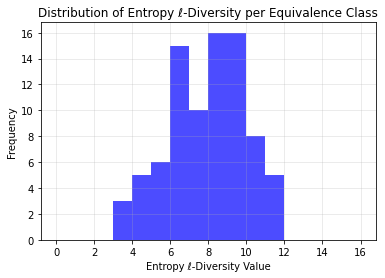

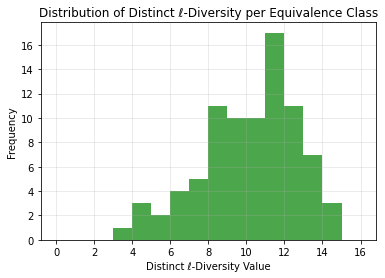

In [327]:
# The bins for the plot
bins = range(0,17)

# First figure for Entropy ℓ-Diversity
p2e_figure_1 = pyplot.figure()
pyplot.hist(p2c_eqv_classes['lEntropy'], bins=bins, color='blue', alpha=0.7)
pyplot.xlabel('Entropy ℓ-Diversity Value')
pyplot.ylabel('Frequency')
pyplot.title('Distribution of Entropy ℓ-Diversity per Equivalence Class')
pyplot.grid(True, alpha=0.3)
pyplot.show()

# Second figure for Distinct ℓ-Diversity
p2e_figure_2 = pyplot.figure()
pyplot.hist(p2c_eqv_classes['lDistinct'], bins=bins, color='green', alpha=0.7)
pyplot.xlabel('Distinct ℓ-Diversity Value')
pyplot.ylabel('Frequency')
pyplot.title('Distribution of Distinct ℓ-Diversity per Equivalence Class')
pyplot.grid(True, alpha=0.3)
pyplot.show()


Run the following cell to print the outcomes of your code.

In [328]:
__problem = '2e'

p2e_nr_children_1 = len(p2e_figure_1.get_children())
p2e_nr_children_2 = len(p2e_figure_2.get_children())
if p2e_nr_children_1 <= 1 or p2e_nr_children_2 <= 1:
    safe_print_err("Missing/incomplete answer to 2(e)")
else:
    print_mk(f"p2e_figure_1 has ${p2e_nr_children_1}$ children")
    print_mk(f"p2e_figure_2 has ${p2e_nr_children_2}$ children")

p2e_figure_1 has $2$ children

p2e_figure_2 has $2$ children

### In this Markdown cell, answer the following question

Based on the result, is our generalization a good generalization in terms of the utility-privacy tradeoff, in your opinion? Explain.

***Place your answer here***

---

# Problem 3

In this problem, we will study $t$-Closeness.

## (a) Earth Movers Distance

In this part, we will implement the function `EMD_ordered_distance()`. Complete your implementation of the function `EMD_ordered_distance()` below.

The function `EMD_ordered_distance()` takes three arguments:
- `data_table`: the data table to be analyzed.
- `quasi_identifiers`: a list containing the names of the columns that constitute the set of quasi-identifiers.
- `sensitive_column`: the column name of the (single) sensitive attribute.
- `sensitive_values_order`: the order of the sensitive values for which to use in the ordered ground distance calculation.

The function will assume that the published table consists only of the quasi-identifiers and the single sensitive attribute (and ignore all other columns).

The function `EMD_ordered_distance` shall return two outputs:
- `t`: the best value $t$ that the table `data_table` (input argument) satisfies $t$-Closeness with respect to the set of quasi-identifiers `quasi_identifiers` (input argument) and the sensitive attribute `sensitive_column` (input argument) using Ordered Ground Distance, and using the order of sensitive attributes specified in `sensitive_values_order` (input argument).
- `equivalence_classes`: a table of equivalence classes (similar to the last two problems), including an extra column: `EMD` that indicates the Earth Mover's Distance for each corresponding equivalence class using the sensitive attribute `sensitive_column` (input argument), using Ordered Ground Distance, and using the order of sensitive attributes specified in `sensitive_values_order` (input argument).

Replace the following code snippet with your answer:

In [329]:
# Your solution goes here

Run the following cell to print the outcomes of your code.

The following code will use the function `EMD_ordered_distance()` to generate the following variables:
- `p3a_t_c1`, `p3a_eqv_classes_c1`: The return values from the function using
    - Table `Lab2_Data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
    - Sensitive attributes order: `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]`.
- `p3a_t_c2`, `p3a_eqv_classes_c2`: The return values from the function using
    - Table `p1g_data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
    - Sensitive attributes order: `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]`.
- `p3a_t_c3`, `p3a_eqv_classes_c3`: The return values from the function using
    - Table `p2c_data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
    - Sensitive attributes order: `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]`.
- `p3a_t_c4`, `p3a_eqv_classes_c4`: The return values from the function using
    - Table `Lab2_Data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
    - Sensitive attributes order: `[1, 2, 3, 4, 12, 13, 5, 6, 7, 8, 9, 10, 14, 15]`.
- `p3a_t_c5`, `p3a_eqv_classes_c5`: The return values from the function using
    - Table `p1g_data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
    - Sensitive attributes order: `[1, 2, 3, 4, 12, 13, 5, 6, 7, 8, 9, 10, 14, 15]`.
- `p3a_t_c6`, `p3a_eqv_classes_c6`: The return values from the function using
    - Table `p2c_data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
    - Sensitive attributes order: `[1, 2, 3, 4, 12, 13, 5, 6, 7, 8, 9, 10, 14, 15]`.

In [330]:
__problem = '3a'

try:
    qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
    SA = 'Household_Income'
    sens_values_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]
    p3a_t_c1, p3a_eqv_classes_c1 = EMD_ordered_distance(Lab2_Data, qID, SA, sens_values_order)

    p3a_t_c2, p3a_eqv_classes_c2 = EMD_ordered_distance(p1g_data, qID, SA, sens_values_order)

    p3a_t_c3, p3a_eqv_classes_c3 = EMD_ordered_distance(p2c_data, qID, SA, sens_values_order)

    sens_values_order = [1, 2, 3, 4, 12, 13, 5, 6, 7, 8, 9, 10, 14, 15]

    p3a_t_c4, p3a_eqv_classes_c4 = EMD_ordered_distance(Lab2_Data, qID, SA, sens_values_order)

    p3a_t_c5, p3a_eqv_classes_c5 = EMD_ordered_distance(p1g_data, qID, SA, sens_values_order)

    p3a_t_c6, p3a_eqv_classes_c6 = EMD_ordered_distance(p2c_data, qID, SA, sens_values_order)

    print_mk(f"\
| Case # | Table       | Quasi-Identifiers       | Sensitive Attribute | Order                                           | $t$            | # ECs                     |\n\
| :-     | :-          | :-                      | :-                  | :-                                              | :-:            | :-:                       |\n\
| 1      | `Lab2_Data` | Full                    | `Household_Income`  | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15] | {p3a_t_c1:.4f} | {len(p3a_eqv_classes_c1)} |\n\
| 2      | `p1g_data`  | Full                    | `Household_Income`  | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15] | {p3a_t_c2:.4f} | {len(p3a_eqv_classes_c2)} |\n\
| 3      | `p2c_data`  | Full                    | `Household_Income`  | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15] | {p3a_t_c3:.4f} | {len(p3a_eqv_classes_c3)} |\n\
| 4      | `Lab2_Data` | Full                    | `Household_Income`  | [1, 2, 3, 4, 12, 13, 5, 6, 7, 8, 9, 10, 14, 15] | {p3a_t_c4:.4f} | {len(p3a_eqv_classes_c4)} |\n\
| 5      | `p1g_data`  | Full                    | `Household_Income`  | [1, 2, 3, 4, 12, 13, 5, 6, 7, 8, 9, 10, 14, 15] | {p3a_t_c5:.4f} | {len(p3a_eqv_classes_c5)} |\n\
| 6      | `p2c_data`  | Full                    | `Household_Income`  | [1, 2, 3, 4, 12, 13, 5, 6, 7, 8, 9, 10, 14, 15] | {p3a_t_c6:.4f} | {len(p3a_eqv_classes_c6)} |\n\
")
except Exception as e:
    safe_print_err(e)

<div class='alert alert-block alert-danger'><b>Error in problem 3a</b>: 'EMD_ordered_distance' is not defined.</div>

### In this Markdown cell, answer the following question

Which Case # has the best t-Closeness guarantee? Explain.

***Place your answer here***

---

## (b) Any Disclosure?

$\ell$-Diversity and $k$-Anonymity are giving us certain guarantees on the privacy of the dataset `p2c_data`. We learned that this alone is sometimes not sufficient, as the distribution of values within an equivalence class may be revealing about an individual.

For this part, we will use household income to investigate that. We first note that the code values $12$ and $13$ for `Household_Income` are not mutually exclusive with the rest of the responses, so we remove the from the dataset, and store the resulting dataset in the variable `p3b_data`.

```python
p3b_data = p2c_data.iloc[numpy.isin(p2c_data.Household_Income, [12, 13], invert=True),:].copy()
```

Reidentify the dataset `p3b_data` using the made-up identities from `p2d_identities`, and create the following variables:
- `p3b_reidentified_data`: the result of the join between `p3b_data` and `p2d_identities`.
- `p3b_household_income_jerzy`: extract the possible values for the `Household_Income` attribute for subject 'Bernelle Ellette Jerzy'. Make sure you keep the frequency of the points you extract intact because we want to study the distrubtion of the values.

Include the resulting figure (code provided after your snippet) in your report.

Complete the following code snippet with your answer:

In [331]:
# qIDs
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
# Clean up the data
p3b_data = p2c_data.iloc[numpy.isin(p2c_data.Household_Income, [12, 13], invert=True),:].copy()

# Your solution goes here

Run the following cell to print the outcomes of your code.

<div class='alert alert-block alert-danger'><b>Error in problem 3b</b>: 'p3b_household_income_jerzy' is not defined.</div>

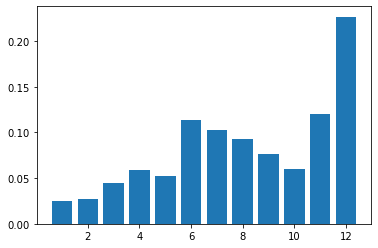

In [332]:
__problem = '3b'

try:
    fh = pyplot.figure()
    cts = p3b_data.Household_Income.value_counts(normalize=True)[list(range(1,11)) + [14, 15]]
    pyplot.bar(range(1,13), cts)
    # for presentation purposes.
    p3b_household_income_jerzy_changed = p3b_household_income_jerzy.copy()
    p3b_household_income_jerzy_changed.iloc[p3b_household_income_jerzy_changed == 14] = 11
    p3b_household_income_jerzy_changed.iloc[p3b_household_income_jerzy_changed == 15] = 12

    cts = p3b_household_income_jerzy_changed.value_counts(normalize=True)
    bh = pyplot.bar(cts.index,cts, .5)
    pyplot.xlabel('Household Income (Lower End x$1000)')
    pyplot.ylabel('Probability')
    pyplot.title('Distribution of Household Income')
    pyplot.legend(['Random Person', 'Bernelle Ellette Jerzy'])
    pyplot.xticks(range(1,13), labels=[0, 5, 10, 15, 20, 25, 35, 45, 55, 65, 75, 100], rotation=45);
except Exception as e:
    safe_print_err(e)

### In this Markdown cell, answer the following question

What can you learn (statistically) about Bernelle's level of income compared to a random person in the table?

***Place your answer here***

---

## (c) Anonymize the Table

Let's generalize the table `p3b_data` further and examine what happens to the $t$-closeness guarantee.

Write code that makes the following generalization on top of the previous generalization applied to `p3b_data`:
- `Gender`: generalize the values to 3="Other" only for records with property Race = 8

Assign this new generalized version of the data to the variable `p3c_data`.

**Make sure you don't directly edit the table `p3b_data` so to not affect the following parts/problems. For that, take a look at the function [`DataFrame.copy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)**.

Complete the following code snippet with your answer:

In [333]:
# qIDs
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
# Start from the last cleaned table
p3c_data = p3b_data.copy()

# Your solution goes here

Run the following cell to print the outcomes of your code.

The following code will use the function `EMD_ordered_distance()` to generate the following variables:
- `p3c_t_prior`, `p3c_eqv_classes_prior`: The return values from the function using
    - Table `p3b_data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
    - Sensitive attributes order: `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15]`.
- `p3c_t_post`, `p3c_eqv_classes_post`: The return values from the function using
    - Table `p3c_data`,
    - Sensitive attribute `Household_Income`, and
    - Quasi-identifiers `['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']`.
    - Sensitive attributes order: `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15]`.

In [334]:
__problem = '3c'

try:
    print_mk("**Prior to generalization**:")

    qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
    SA = 'Household_Income'
    SA_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15]
    p3c_t_prior, p3c_eqv_classes_prior = EMD_ordered_distance(p3b_data, qID, SA, SA_order)
    print_mk(f'The table p3b_data(Household_Income) is ${p3c_t_prior:.4f}$-Close (full qids)\n')
    display(p3c_eqv_classes_prior)

    print_mk(f'The following are the equivalence classes of p3b_data with $EMD={p3c_t_prior:.4f}$\n')
    display(p3c_eqv_classes_prior.loc[p3c_eqv_classes_prior.EMD == p3c_t_prior, :])


    print_mk("**Afrer generalization**:")

    qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
    SA = 'Household_Income'
    SA_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15]
    p3c_t_post, p3c_eqv_classes_post = EMD_ordered_distance(p3c_data, qID, SA, SA_order)
    print_mk(f'The table p3c_data(Household_Income) is ${p3c_t_post:.4f}$-Close (full qids)\n')
    display(p3c_eqv_classes_post)

    print_mk(f'The following are the equivalence classes of p3c_data with $EMD={p3c_t_post:.4f}$\n')
    display(p3c_eqv_classes_post.loc[p3c_eqv_classes_post.EMD == p3c_t_post, :])
except Exception as e:
    safe_print_err(e)

**Prior to generalization**:

<div class='alert alert-block alert-danger'><b>Error in problem 3c</b>: 'EMD_ordered_distance' is not defined.</div>

### In this Markdown cell, answer the following question

Using the set of QIDs:

```python
qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']
```

Did the privacy guarantee improve compared to before?

***Place your answer here***

---

## (d) Distribution of t?

One way to visualize the utility-privacy tradeoff is as follows. The more we generalize, the less utility we have (even though $t$ improves). However, if we generalize a table in such a way that, for example, one equivalence class has $t=0.5$ and all other equivalence classes have $t=0.1$ (resulting in a best guarantee for the table of $t=0.5$) then perhaps there's a better generalization that would make the rest of the equivalence classes have a larger $t$ than $0.1$ (but still at most $0.5$), and thus provide the same $t$-closeness guarantee while potentially providing higher utility because that table is less generalized.

In this part, we will look at the distribution of the EMD values for the different equivalence classes as a way to study this utility-privacy tradeoff.

Write code that plots a histograms of the EMD values for the different equivalence classes (for the generalized table from part **3c**).

Use $15$ bins in the histogram.

Don't forget to label the axes and title the figure.

Complete the following code snippet with your answer:

In [335]:
# Number of bins:
bins=15

p3d_figure = pyplot.figure()
# Your solution goes here

<Figure size 432x288 with 0 Axes>

Run the following cell to print the outcomes of your code.

In [336]:
__problem = '3d'

p3d_nr_children = len(p3d_figure.get_children())
if p1h_nr_children <= 1:
    safe_print_err("Missing/incomplete answer to 3(d)")
else:
    print_mk(f"p3d_figure has ${p3d_nr_children}$ children")

p3d_figure has $1$ children

### In this Markdown cell, answer the following question

Based on the result, is our generalization a good generalization in terms of the utility-privacy tradeoff, in your opinion? Explain.

***Place your answer here***

---

## (e) Try Again?

We now plot the distribution of household income globally and for Bernelle before and after the latest generalization.

**This part has no code for you to write, just answer the question that follows.**

The list of `Household_Income` values for Bernelle is [$$]

<div class='alert alert-block alert-danger'><b>Error in problem 3e</b>: 'p3b_household_income_jerzy_changed' is not defined.</div>

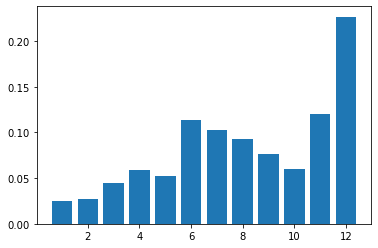

In [337]:
__problem = '3e'

try:
    # Start from the last cleaned table
    p5e_identities = p2d_identities.copy()

    # Merge genders for Race=8.
    # Setting the Gender for these rows to 3 = "Person"
    p5e_identities.loc[p5e_identities.Race==8, 'Gender'] = 3

    qID = ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race']

    p5e_reidentified_data = p5e_identities.dropna(subset=qID).merge(p3c_data)
    p5e_household_income_jerzy_new = p5e_reidentified_data.Household_Income[p5e_reidentified_data.Full_Name == 'Bernelle Ellette Jerzy']
    print_mk(f"The list of `Household_Income` values for Bernelle is [${', '.join([str(item) for item in p5e_household_income_jerzy_new])}$]")

    # Now plot

    fh = pyplot.figure()
    cts = p3c_data.Household_Income.value_counts(normalize=True)[list(range(1,11)) + [14, 15]]
    pyplot.bar(range(1,13), cts)

    cts = p3b_household_income_jerzy_changed.value_counts(normalize=True)
    bh = pyplot.bar(cts.index,cts, .7)

    # for presentation purposes.
    p3e_household_income_jerzy_new_changed = p5e_household_income_jerzy_new.copy()
    p3e_household_income_jerzy_new_changed.iloc[p5e_household_income_jerzy_new == 14] = 11
    p3e_household_income_jerzy_new_changed.iloc[p5e_household_income_jerzy_new == 15] = 12

    cts = p3e_household_income_jerzy_new_changed.value_counts(normalize=True)
    bh = pyplot.bar(cts.index,cts, .4)
    pyplot.xlabel('Household Income (Lower End x$1000)')
    pyplot.ylabel('Probability')
    pyplot.title('Distribution of Household Income')
    pyplot.legend(['Random Person', 'Bernelle Ellette Jerzy', 'Bernelle Ellette Jerzy After Generalization'])
    pyplot.xticks(range(1,13), labels=[0, 5, 10, 15, 20, 25, 35, 45, 55, 65, 75, 100], rotation=45);
except Exception as e:
    safe_print_err(e)

### In this Markdown cell, answer the following question

Did we succeed decreasing the risk of disclosure? Explain.

***Place your answer here***

---

# Problem 4

List all individuals and sources that you consulted with while working on this assignment.

***Place your answer here***